In [13]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [14]:
with open("D:/AiXELO_Project/AXL/.venv/Lib/site-packages/fairchem/data/odac/force_field/data_w_oms.json", "r") as f:
    raw_data = json.load(f)
df = pd.DataFrame(raw_data)

In [15]:
df

,name,y,y_sys,y_mof,y_mol,id,set,path,oms,defective,ff
0,AVIPAX_0.04_0_w_CO2_4,-0.161801,-2769.464134,-2746.312874,-22.989459,0_100,train,/private/home/sihoonchoi/dac_materials/data/va...,False,True,-0.169341
1,LAHTUM_0.12_0_w_CO2_3,-0.206520,-1547.033180,-1523.837632,-22.989028,0_120,train,/private/home/sihoonchoi/dac_materials/data/va...,False,True,-0.220858
2,PATWOY_0.08_1_w_CO2_1,-0.294263,-3716.225971,-3692.942710,-22.988998,0_140,train,/private/home/sihoonchoi/dac_materials/data/va...,False,True,-0.355197
3,XIWLAQ_0.16_0_w_CO2_1,-0.388730,-249.114937,-225.664885,-23.061322,0_160,train,/private/home/sihoonchoi/dac_materials/data/va...,False,True,-0.353169
4,DOYLEI_0.05_1_w_CO2_random_1,-0.260775,-645.854751,-622.605364,-22.988612,0_180,train,/private/home/sihoonchoi/dac_materials/data/va...,False,True,-0.200542
...,...,...,...,...,...,...,...,...,...,...,...
51473,RIPKIM_w_H2O_random_2,-0.031546,-1657.344833,-1643.080736,-14.232551,9_467,test,/private/home/sihoonchoi/dac_materials/data/va...,False,False,-0.078312
51474,VAGMAT_w_H2O_random_1,-0.040468,-1068.927235,-1054.651702,-14.235065,9_468,test,/private/home/sihoonchoi/dac_materials/data/va...,True,False,-0.030854
51475,VAGMAT_w_H2O_random_2,-0.129577,-1069.019475,-1054.655399,-14.234498,9_469,test,/private/home/sihoonchoi/dac_materials/data/va...,True,False,-0.054901
51476,ZURROT_w_H2O_random_1,-0.531859,-433.125732,-418.361192,-14.232682,9_470,test,/private/home/sihoonchoi/dac_materials/data/va...,True,False,-0.379988


In [16]:
df = df.drop(columns=["name", "path", "id", "set"])
df["oms"] = df["oms"].astype(int)
df["defective"] = df["defective"].astype(int)
df = df.dropna()

target_column = "y"
y = df[target_column]
X = df.drop(columns=[target_column])

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

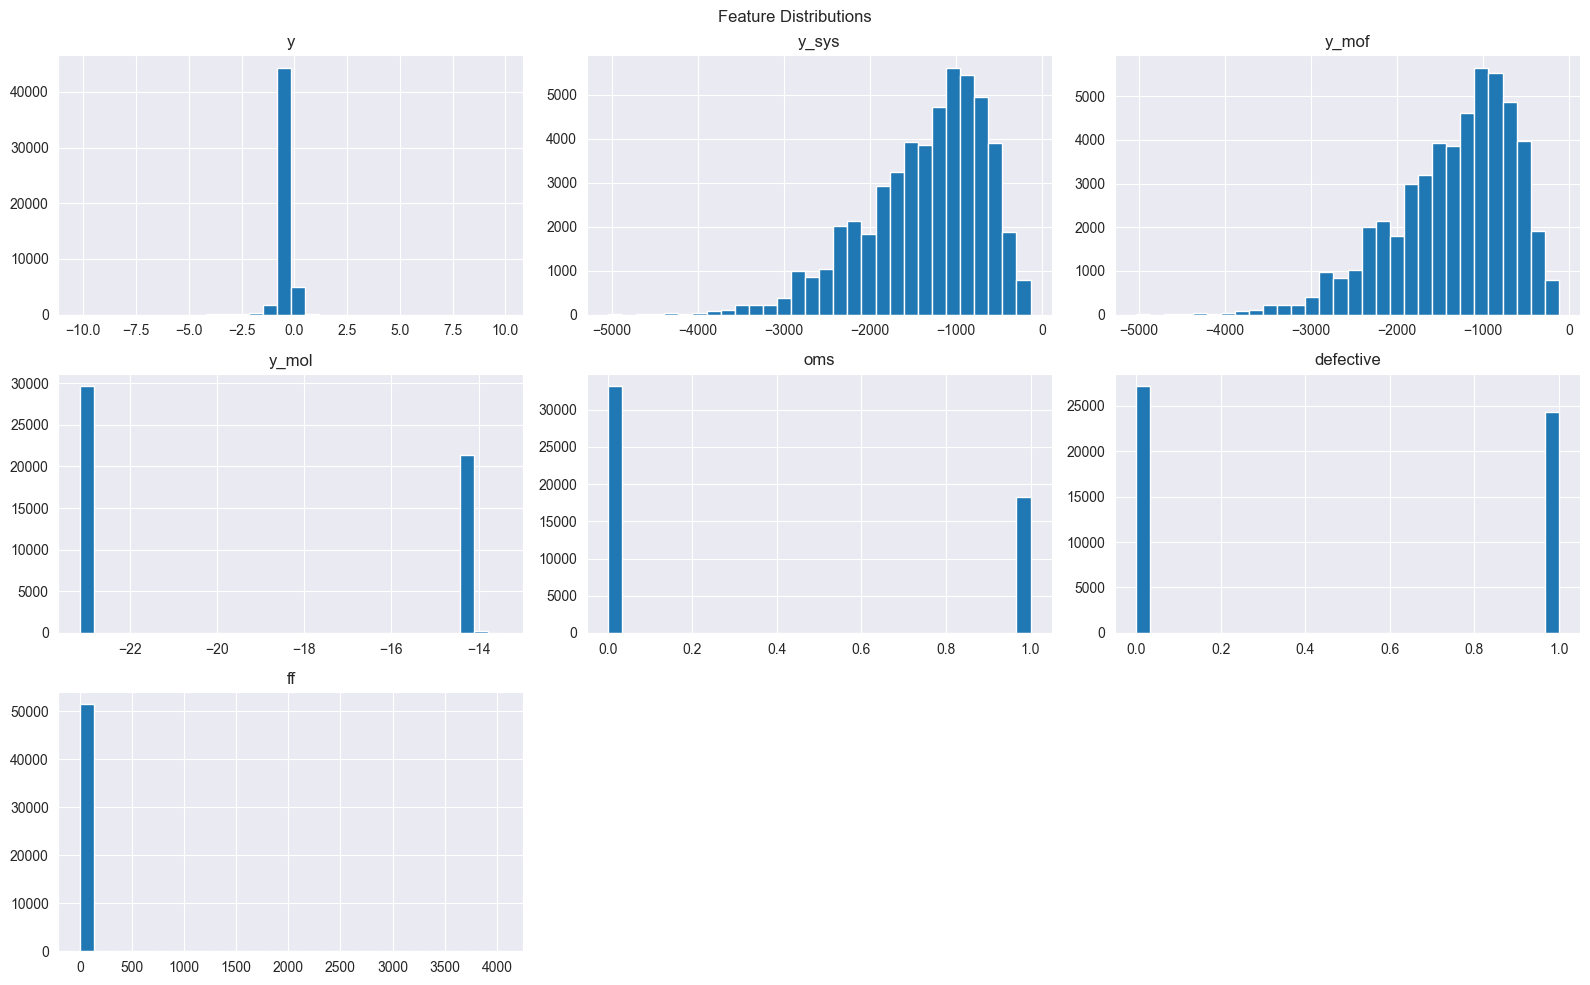

In [18]:
df.hist(figsize=(16, 10), bins=30)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

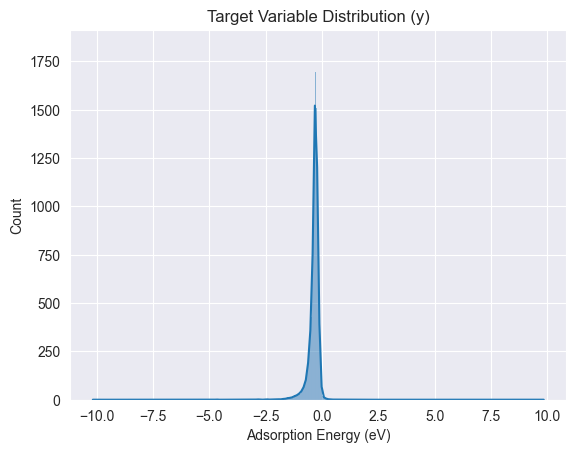

In [19]:
sns.histplot(y, kde=True)
plt.title("Target Variable Distribution (y)")
plt.xlabel("Adsorption Energy (eV)")
plt.show()

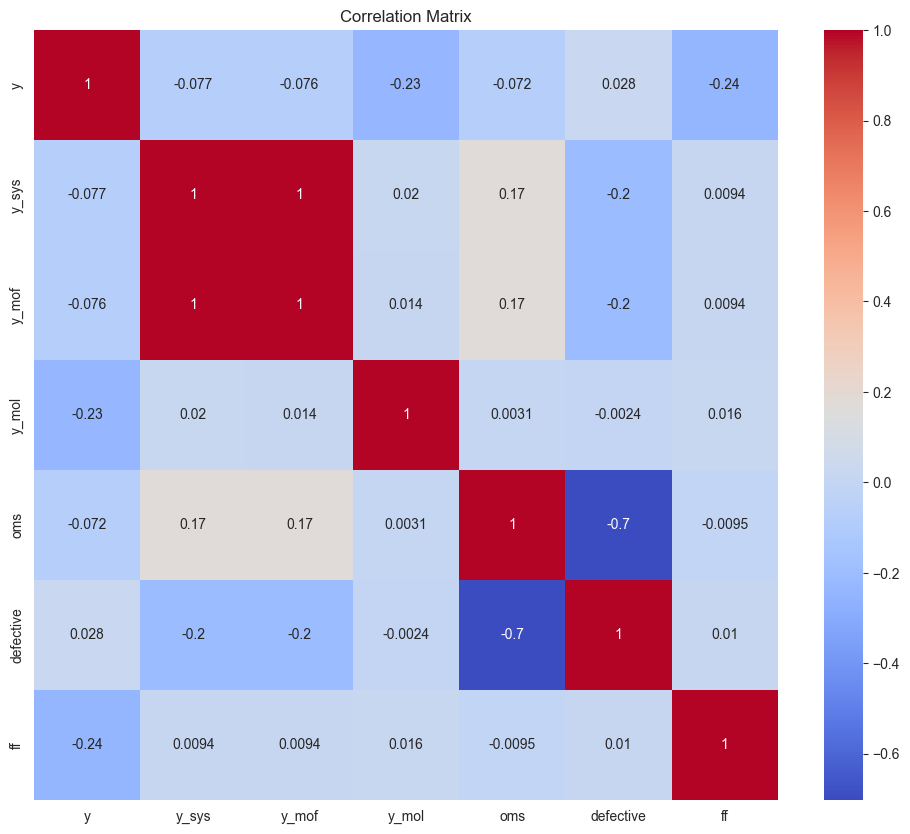

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

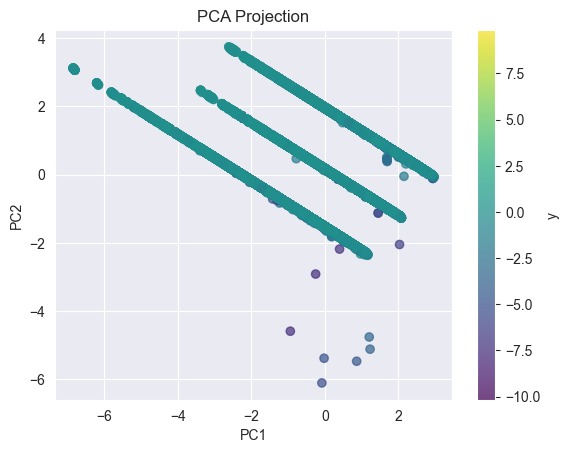

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", alpha=0.7)
plt.colorbar(label="y")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection")
plt.show()

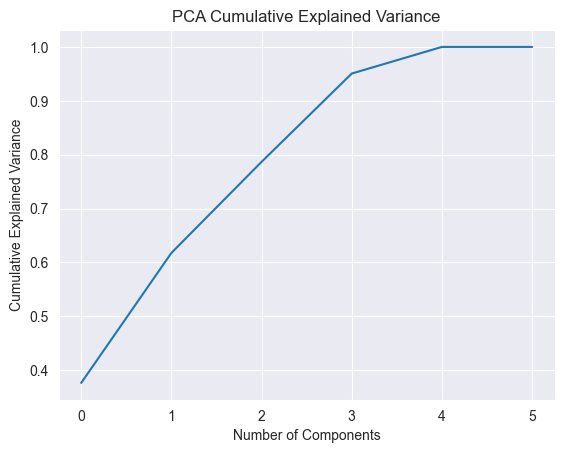

In [22]:
pca_full = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Explained Variance")
plt.grid(True)
plt.show()


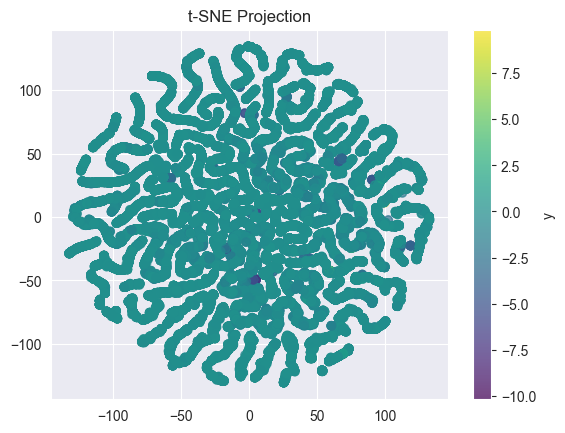

In [23]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="viridis", alpha=0.7)
plt.colorbar(label="y")
plt.title("t-SNE Projection")
plt.show()

D:\AiXELO_Project\AXL\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
D:\AiXELO_Project\AXL\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


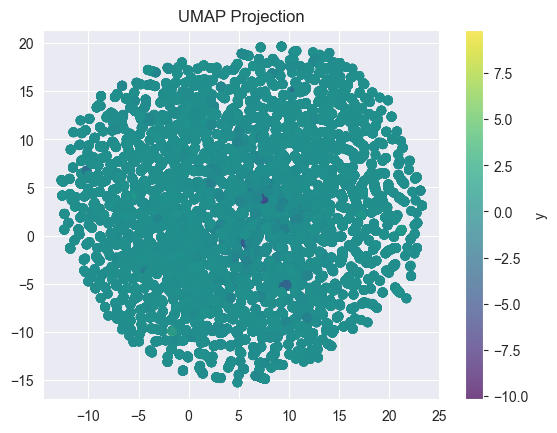

In [24]:
reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap="viridis", alpha=0.7)
plt.colorbar(label="y")
plt.title("UMAP Projection")
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
param_grid = {
    "n_estimators": [300],
    "max_depth": [10, 15, 20],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [1, 2]
}
grid = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4], 'n_estimators': [300]},
             scoring='r2')

In [27]:
print("Best params:", grid.best_params_)

model = grid.best_estimator_
y_pred = model.predict(X_test)

print(f"R² score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")

Best params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
R² score: 0.735
MAE: 0.069


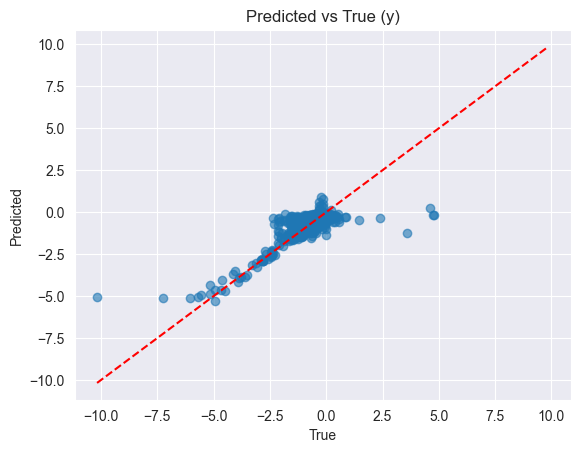

In [28]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Predicted vs True (y)")
plt.show()

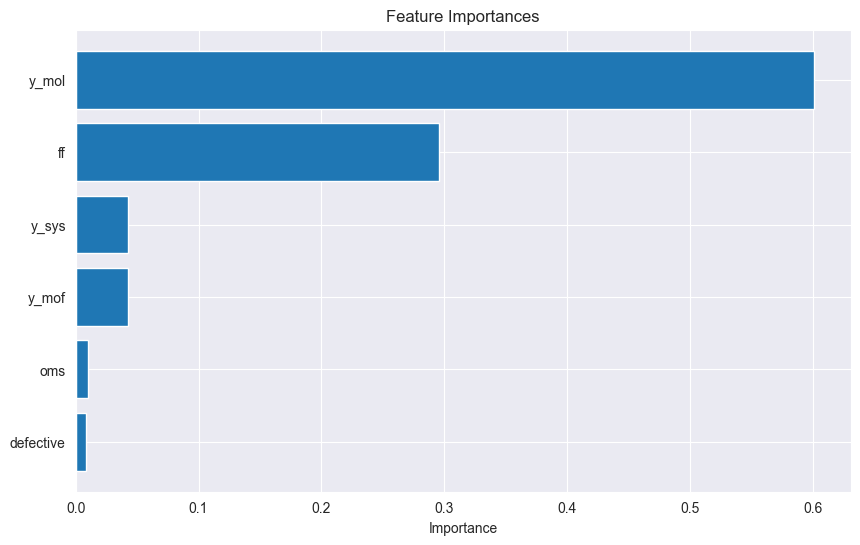

In [29]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importances[indices])
plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

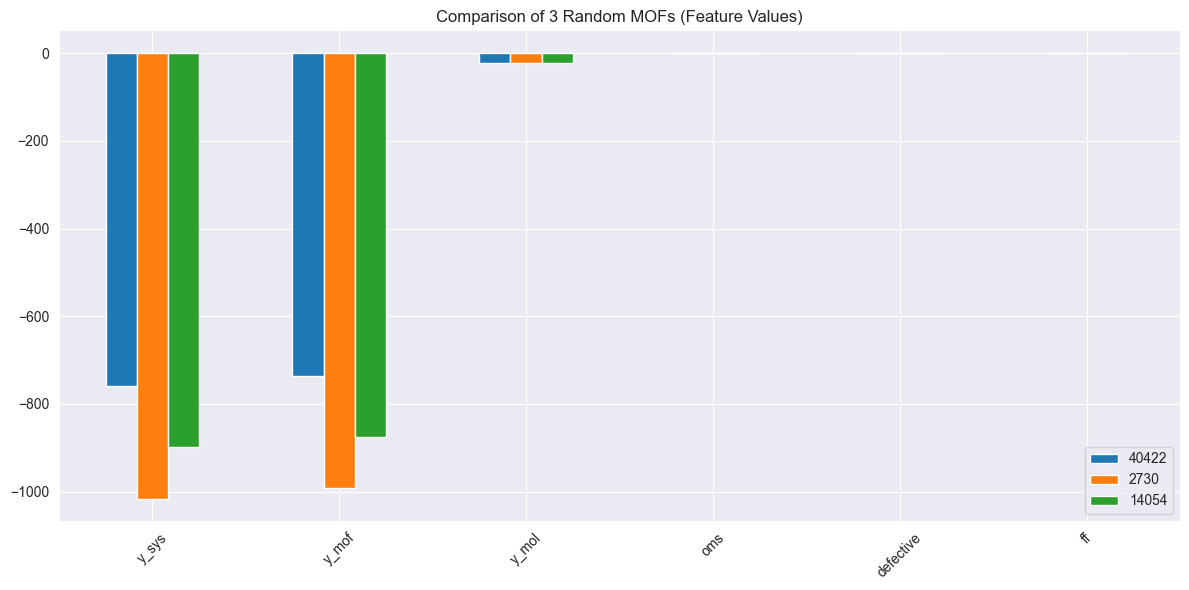

In [30]:
example_idx = df.sample(3, random_state=1).index
df_example = df.iloc[example_idx].drop(columns=[target_column])

df_example.T.plot(kind="bar", figsize=(12, 6))
plt.title("Comparison of 3 Random MOFs (Feature Values)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()